# Assignment 5 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [1]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2 ,mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  cross_validate ,RepeatedKFold , RepeatedStratifiedKFold
from sklearn.ensemble import StackingClassifier,BaggingClassifier
from numpy import mean ,std
from matplotlib import pyplot

# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [2]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [3]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [4]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [5]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
#!pip install hebrew_tokenizer

In [6]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

C:\Users\yahav


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [7]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [8]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [9]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

In [10]:
# Parameters for each model we try:
params = {'lr': {'C': [0.01, 0.1, 1, 10, 100,200], 'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                'class_weight':['balanced',None],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 'multi_class':['auto', 'ovr', 'multinomial']},
          'knn': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'],
                  'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']},
          'cart': {'max_depth': [3, 5, 7], 'criterion': ['gini', 'entropy']
                   ,'splitter':["best", "random"],'max_features':[None,"auto", "sqrt", "log2"],
                    'class_weight':[None,"balanced", "balanced_subsample"],
                   'random_state':[0,42,None]},
          'svm': {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf','poly','sigmoid',],
                  'random_state':[0,42,None],'gamma':['scale', 'auto'],'class_weight':['balanced',None]
                  ,'decision_function_shape':['ovo', 'ovr']},
          'LinearSVC': {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'dual': [False,True],
                        'loss':['hinge', 'squared_hinge'],'multi_class':['ovr', 'crammer_singer'],
                         'class_weight':['balanced',None],'random_state':[0,42,None]},
          'MLPClassifier': {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                            'activation': ['tanh', 'relu','identity', 'logistic'],
                            'solver': ['sgd', 'adam','lbfgs'],'random_state':[0,42,None],
                            'alpha': [0.0001, 0.05],
                            'learning_rate': ['constant','adaptive','invscaling']},
          'Perceptron': {'alpha': [0.0001, 0.05], 'penalty': [None, 'l2', 'l1', 'elasticnet']
                        ,'random_state':[0,42,None],'class_weight':['balanced',None],
                         'early_stopping':[False,True],'shuffle':[False,True]},
          'SGDClassifier': {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron',
                                     'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                            'penalty': ['l2', 'l1', 'elasticnet'],
                            'alpha': [0.0001, 0.05],
                            'shuffle':[False,True],'early_stopping':[False,True]},
           'MultinomialNB':{'alpha':[1,0.1,0.01,0.001,0.0001,0.00001],'fit_prior':[True,False]}}

# List of models we try on our data
models_list = {'lr': LogisticRegression(),
            'knn': KNeighborsClassifier(),
            'cart': DecisionTreeClassifier(),
            'svm': SVC(),
            'LinearSVC':LinearSVC(),
            'MLPClassifier':MLPClassifier(),
            'Perceptron':Perceptron(),
            'SGDClassifier':SGDClassifier(),
            'MultinomialNB':MultinomialNB()}

# Function that uses the hebrew_tokenizer to tokenize the text
def tokenize_text(text):
    tokens = ht.tokenize(text)
    return tokens


In [11]:
# Choosing which vectorizer to uze:
vectorizer = 'TfidfVectorizer'
#vectorizer = 'CountVectorizer'

train_file_name = 'annotated_corpus_for_train.csv'
df = pd.read_csv(train_file_name, index_col=None, encoding='utf-8') 

# Removing all of the numbers,punctuations from the train set
r = re.compile(r'[^\w\s]')
df['story'] = [r.sub('',s) for s in df['story'].tolist()]
r = re.compile(r'\d+')
df['story'] = [r.sub('',s) for s in df['story'].tolist()]
r = re.compile(r'\s+')
df['story'] = df['story'].str.strip()

# Spliting the train set into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(df['story'], df['gender'], test_size=0.2, random_state=42)


# Vectorize the text data using the vectorizer we chose above  
if vectorizer == 'TfidfVectorizer':
    vectorizer = TfidfVectorizer(min_df= 5 ,ngram_range= (1,1))
    
if vectorizer == 'CountVectorizer':
    vectorizer = CountVectorizer(min_df= 5)
        
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


# Perform feature selection using mutual information
selector = SelectKBest(mutual_info_classif, k=1000) 
selector.fit(X_train_vectorized, y_train)

# Apply feature selection to the vectorized data
X_train_selected = selector.transform(X_train_vectorized)
X_test_selected = selector.transform(X_test_vectorized)

# Scaling the data by using MinMaxScaler
scaler = MinMaxScaler()
    
X_train_scaled = scaler.fit_transform(X_train_selected.toarray())
X_test_scaled = scaler.transform(X_test_selected.toarray())
    

SelectKBest(k=1000,
            score_func=<function mutual_info_classif at 0x0000026416E81280>)

In [12]:
# Finding best parameters from each model by using GridSearchCV
best_params = {}
for name, model in models_list.items():
    print(name)
    clf = GridSearchCV(model, params[name], cv=5, n_jobs=-1)
    clf.fit(X_train_selected, y_train)
    best_params[name] = clf.best_params_

lr


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 200],
                         'class_weight': ['balanced', None],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

knn


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

cart


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced',
                                          'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'random_state': [0, 42, None],
                         'splitter': ['best', 'random']})

svm


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'random_state': [0, 42, None]})

LinearSVC


GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'dual': [False, True],
                         'loss': ['hinge', 'squared_hinge'],
                         'multi_class': ['ovr', 'crammer_singer'],
                         'penalty': ['l1', 'l2'],
                         'random_state': [0, 42, None]})

MLPClassifier


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'identity', 'logistic'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive',
                                           'invscaling'],
                         'random_state': [0, 42, None],
                         'solver': ['sgd', 'adam', 'lbfgs']})

Perceptron


GridSearchCV(cv=5, estimator=Perceptron(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.05],
                         'class_weight': ['balanced', None],
                         'early_stopping': [False, True],
                         'penalty': [None, 'l2', 'l1', 'elasticnet'],
                         'random_state': [0, 42, None],
                         'shuffle': [False, True]})

SGDClassifier


GridSearchCV(cv=5, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.05],
                         'early_stopping': [False, True],
                         'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron', 'squared_loss',
                                  'huber', 'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'shuffle': [False, True]})

MultinomialNB


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'fit_prior': [True, False]})

In [13]:
best_params

{'lr': {'C': 200,
  'class_weight': None,
  'multi_class': 'auto',
  'penalty': 'l2',
  'solver': 'saga'},
 'knn': {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'},
 'cart': {'class_weight': None,
  'criterion': 'entropy',
  'max_depth': 3,
  'max_features': None,
  'random_state': None,
  'splitter': 'random'},
 'svm': {'C': 100,
  'class_weight': 'balanced',
  'decision_function_shape': 'ovo',
  'gamma': 'scale',
  'kernel': 'linear',
  'random_state': 0},
 'LinearSVC': {'C': 100,
  'class_weight': None,
  'dual': True,
  'loss': 'squared_hinge',
  'multi_class': 'ovr',
  'penalty': 'l2',
  'random_state': 42},
 'MLPClassifier': {'activation': 'logistic',
  'alpha': 0.05,
  'hidden_layer_sizes': (100,),
  'learning_rate': 'adaptive',
  'random_state': None,
  'solver': 'lbfgs'},
 'Perceptron': {'alpha': 0.0001,
  'class_weight': None,
  'early_stopping': False,
  'penalty': 'l2',
  'random_state': 0,
  'shuffle': False},
 'SGDClassifier': {'alpha': 0.0001,
  'early_stop

In [14]:
# Making a dictionary that have all the models we want to try and there best parameters.
models = dict()
models['lr'] = LogisticRegression(**best_params['lr'])
models['knn'] = KNeighborsClassifier(**best_params['knn'])
models['cart'] = DecisionTreeClassifier(**best_params['cart'])
models['svm'] = SVC(**best_params['svm'])
models['LinearSVC'] = LinearSVC(**best_params['LinearSVC'])
models['MLPClassifier'] = MLPClassifier(**best_params['MLPClassifier'])
models['Perceptron'] = Perceptron(**best_params['Perceptron'])
models['SGDClassifier'] = SGDClassifier(**best_params['SGDClassifier'])
models['MultinomialNB'] = MultinomialNB(**best_params['MultinomialNB'])

models

{'lr': LogisticRegression(C=200, solver='saga'),
 'knn': KNeighborsClassifier(n_neighbors=3, weights='distance'),
 'cart': DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='random'),
 'svm': SVC(C=100, class_weight='balanced', decision_function_shape='ovo',
     kernel='linear', random_state=0),
 'LinearSVC': LinearSVC(C=100, random_state=42),
 'MLPClassifier': MLPClassifier(activation='logistic', alpha=0.05, learning_rate='adaptive',
               solver='lbfgs'),
 'Perceptron': Perceptron(penalty='l2', shuffle=False),
 'SGDClassifier': SGDClassifier(penalty='elasticnet'),
 'MultinomialNB': MultinomialNB(alpha=1, fit_prior=False)}

In [15]:
# Get a stacking ensemble of models
# I Learned about the stacking model from here: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/#
level0 = []
level0.append(('lr_bagging', BaggingClassifier(base_estimator=LogisticRegression(**best_params['lr']), n_estimators=100, max_samples=0.8, oob_score=False)))
level0.append(('knn_bagging', BaggingClassifier(base_estimator=KNeighborsClassifier(**best_params['knn']), n_estimators=100, max_samples=0.8, oob_score=False)))
level0.append(('cart_bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier(**best_params['cart']), n_estimators=100, max_samples=0.8, oob_score=False)))
level0.append(('svm_bagging', BaggingClassifier(base_estimator=SVC(**best_params['svm']), n_estimators=100, max_samples=0.8, oob_score=False)))
level0.append(('LinearSVC_bagging', BaggingClassifier(base_estimator=LinearSVC(**best_params['LinearSVC']), n_estimators=100, max_samples=0.8, oob_score=False)))
level0.append(('SGDClassifier_bagging', BaggingClassifier(base_estimator=SGDClassifier(**best_params['SGDClassifier']), n_estimators=100, max_samples=0.8, oob_score=False)))
level0.append(('MLPClassifier', MLPClassifier(**best_params['MLPClassifier'])))
level0.append(('Perceptron', Perceptron(**best_params['Perceptron'])))
#level0.append(('MultinomialNB',BaggingClassifier(base_estimator=MultinomialNB(**best_params['MultinomialNB']), n_estimators=100, max_samples=0.8, oob_score=False) ))
#level0.append(('MultinomialNB',MultinomialNB(**best_params['MultinomialNB'])))

level1 = LogisticRegression(**best_params['lr'])

models['stacking'] = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

models

{'lr': LogisticRegression(C=200, solver='saga'),
 'knn': KNeighborsClassifier(n_neighbors=3, weights='distance'),
 'cart': DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='random'),
 'svm': SVC(C=100, class_weight='balanced', decision_function_shape='ovo',
     kernel='linear', random_state=0),
 'LinearSVC': LinearSVC(C=100, random_state=42),
 'MLPClassifier': MLPClassifier(activation='logistic', alpha=0.05, learning_rate='adaptive',
               solver='lbfgs'),
 'Perceptron': Perceptron(penalty='l2', shuffle=False),
 'SGDClassifier': SGDClassifier(penalty='elasticnet'),
 'MultinomialNB': MultinomialNB(alpha=1, fit_prior=False),
 'stacking': StackingClassifier(cv=5,
                    estimators=[('lr_bagging',
                                 BaggingClassifier(base_estimator=LogisticRegression(C=200,
                                                                                     solver='saga'),
                                                   max_samples=0

In [16]:
conf_mat = []

# Evaluate the models and store the results
results, names = list(), list()
y_predict = list()
score = {}
for name, model in models.items():
    model_train = model.fit(X_train_selected , y_train)
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
    scores = cross_val_score(model_train, X_test_selected, y_test, scoring='accuracy', cv=cv, n_jobs=-1,error_score='raise')
    y_pred = model_train.predict(X_test_selected)
    print(model_train)
    
    f1_male = f1_score(y_test, y_pred, pos_label='m')
    f1_female = f1_score(y_test, y_pred, pos_label='f')
    average_f1=(f1_male + f1_female)/2
    
    conf_mat = confusion_matrix(y_test, y_pred)

    scores =  {'Accuracy': {'mean': mean(scores),'std': std(scores)},
            'F1 Score (male)': f1_male,
            'F1 Score (female)': f1_female,
            'Confusion Matrix': conf_mat,
            'scores':scores ,
            'y_pred':y_pred,
            'average_f1':average_f1,
            'model':model_train}
    
    
    results.append(scores['scores'])
    names.append(name)
    score[name] = scores
    y_predict.append(scores['y_pred'])
    print('%s Accuracy: %.3f (%.3f)' % (name, scores['Accuracy']['mean'], scores['Accuracy']['std']))
    print('F1 Score female: %.3f' % (scores['F1 Score (female)']))
    print('F1 Score male: %.3f' % (scores['F1 Score (male)']))
    print('>F1 Score average_f1: %.3f\n\n\n' % (scores['average_f1']))
    
    

LogisticRegression(C=200, solver='saga')
lr Accuracy: 0.748 (0.079)
F1 Score female: 0.491
F1 Score male: 0.882
>F1 Score average_f1: 0.686



KNeighborsClassifier(n_neighbors=3, weights='distance')
knn Accuracy: 0.757 (0.090)
F1 Score female: 0.000
F1 Score male: 0.860
>F1 Score average_f1: 0.430



DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='random')
cart Accuracy: 0.702 (0.071)
F1 Score female: 0.190
F1 Score male: 0.869
>F1 Score average_f1: 0.530



SVC(C=100, class_weight='balanced', decision_function_shape='ovo',
    kernel='linear', random_state=0)
svm Accuracy: 0.762 (0.084)
F1 Score female: 0.462
F1 Score male: 0.852
>F1 Score average_f1: 0.657



LinearSVC(C=100, random_state=42)
LinearSVC Accuracy: 0.757 (0.085)
F1 Score female: 0.492
F1 Score male: 0.861
>F1 Score average_f1: 0.677



MLPClassifier(activation='logistic', alpha=0.05, learning_rate='adaptive',
              solver='lbfgs')
MLPClassifier Accuracy: 0.759 (0.093)
F1 Score female: 0.483
F1

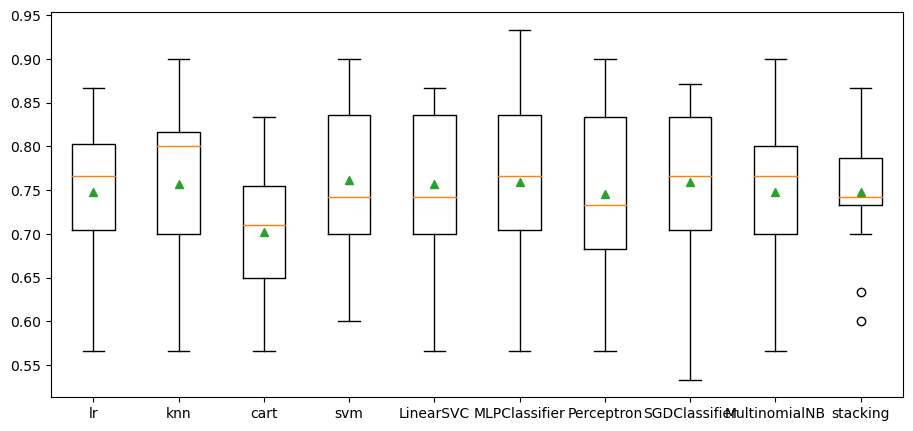

In [17]:
# Plot model performance for comparison
pyplot.figure(figsize=(11,5))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show();

In [18]:
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [19]:
# Removing all of the numbers,punctuations from the test set
r = re.compile(r'[^\w\s]')
df_test['story'] = [r.sub('',s) for s in df_test['story'].tolist()]
r = re.compile(r'\d+')
df_test['story'] = [r.sub('',s) for s in df_test['story'].tolist()]
r = re.compile(r'\s+')
df_test['story'] = df_test['story'].str.strip()

# Vectorize the text data using the vectorizer we chose above 
if vectorizer == 'TfidfVectorizer':
        vectorizer = TfidfVectorizer(min_df= 5 ,ngram_range= (1,1))
    
if vectorizer == 'CountVectorizer':
        vectorizer = CountVectorizer(min_df= 5)

X_test = df['story']
X_test_vect = vectorizer.fit_transform(X_test)

# Perform feature selection using mutual information
selector = SelectKBest(mutual_info_classif, k=1000)
X_test_selected = selector.fit_transform(X_test_vect, np.zeros(X_test_vect.shape[0]))

# Scaling the data by using MinMaxScaler
scaler = MinMaxScaler()

X_test_scaled = scaler.fit_transform(X_test_selected.toarray())

In [20]:
df_predict_dict = {}
for mod in score:
    y_pred = score[mod]['model'].predict(X_test_scaled)
    df_prediction = pd.DataFrame({'story': X_test, 'predicted gender': y_pred})
    print(f"<Model: {mod}>")
    print(df_prediction['predicted gender'].value_counts())
    print("\n")
    df_predict_dict[mod] = df_prediction


df_predicted = df_predict_dict['stacking']

<Model: lr>
f    388
m    365
Name: predicted gender, dtype: int64


<Model: knn>
m    680
f     73
Name: predicted gender, dtype: int64


<Model: cart>
m    737
f     16
Name: predicted gender, dtype: int64


<Model: svm>
f    440
m    313
Name: predicted gender, dtype: int64


<Model: LinearSVC>
f    435
m    318
Name: predicted gender, dtype: int64


<Model: MLPClassifier>
f    417
m    336
Name: predicted gender, dtype: int64


<Model: Perceptron>
f    409
m    344
Name: predicted gender, dtype: int64


<Model: SGDClassifier>
f    418
m    335
Name: predicted gender, dtype: int64


<Model: MultinomialNB>
f    682
m     71
Name: predicted gender, dtype: int64


<Model: stacking>
f    444
m    309
Name: predicted gender, dtype: int64




In [21]:
df_predicted.head()

,story,predicted gender
0,כשחבר הזמין אותי לחול לא באמת חשבתי שזה יקרה פ...,f
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,f
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,כשהייתי ילד מטוסים היה הדבר שהכי ריתק אותי בתו...,m
4,הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכים...,f


In [22]:
df_predicted.tail()

,story,predicted gender
748,אז לפני שנה בדיוק טסתי לאמסטרדם עם שני חברים ט...,f
749,שבוע שעבר העליתי באופן ספונטני רעיון לנסוע עם ...,f
750,לפני חודש עברנו לדירה בבית שמש בעקבות משפחתי ה...,f
751,החוויה אותה ארצה לשתף התרחשה לפני כמה חודשים ז...,f
752,פעם כשהייתי בחו ל בקבולומביה כחלק מהטיול שלי ל...,f


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [23]:
df_predicted.to_csv('classification_results.csv',index=False)